In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import requests



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run g:profiler for functional enrichment analysis

In [5]:
# Load your GO table and query gene sets

query_sets = pd.read_csv('data/GO_term_analysis/100_selected_go_contaminated.csv', index_col=0)

res_df = query_sets.copy()

# Iterate over each gene column
gene_cols = [col for col in query_sets.columns if col.endswith('Genes')]
for gene_col in gene_cols:
    print(gene_col)
    res_df[f'{gene_col} enriched term id'] = None
    res_df[f'{gene_col} enriched term description'] = None
    res_df[f'{gene_col} adj p-value'] = 1
    res_df[f'{gene_col} overlap size'] = None

    for query_index, query_row in tqdm(query_sets.iterrows(), total=query_sets.shape[0]):
            query_genes = query_row[gene_col].split()
            r = requests.post(
                url='https://biit.cs.ut.ee/gprofiler/api/gost/profile',
                json={
                    'organism': 'hsapiens',
                    'query': query_genes,
                    'sources': ['GO:BP'],
                    'user_threshold': 0.05,
                    'significance_threshold_method': 'fdr',
                    'all_results': True  # I am doing my own filtering
                }
            )
            if r.status_code == 200:
                results = r.json().get('result', [])
                if results:
                    significant_results = [res for res in results if res['p_value'] <= 0.05]
                    if significant_results:
                        best_result = significant_results[0]  # Select the first significant result
                        res_df.loc[query_index, f'{gene_col} enriched term id'] = best_result['native']
                        res_df.loc[query_index, f'{gene_col} enriched term description'] = best_result['name']
                        res_df.loc[query_index, f'{gene_col} adj p-value'] = best_result['p_value']
                        res_df.loc[query_index, f'{gene_col} overlap size'] = best_result['intersection_size']
                    else:
                        print('No significant enriched term found for query index:', query_index)
                else:
                    print('No results found for query index:', query_index)
            else:
                print(f'Request failed for query index {query_index} with status code {r.status_code}')
                continue
# res_df.to_csv(f'data/GO_term_analysis/100_GO_terms_enricher_res.tsv', sep='\t', index=True)
res_df.head()

Genes


100%|██████████| 100/100 [02:20<00:00,  1.41s/it]


50perc_contaminated_Genes


 56%|█████▌    | 56/100 [01:13<00:43,  1.00it/s]

No significant enriched term found for query index: GO:0043377


100%|██████████| 100/100 [02:14<00:00,  1.34s/it]


100perc_contaminated_Genes


  2%|▏         | 2/100 [00:01<01:33,  1.05it/s]

No significant enriched term found for query index: GO:0045056


  4%|▍         | 4/100 [00:04<01:48,  1.13s/it]

No significant enriched term found for query index: GO:0036148


  5%|▌         | 5/100 [00:05<01:54,  1.20s/it]

No significant enriched term found for query index: GO:1901797


  6%|▌         | 6/100 [00:07<02:12,  1.41s/it]

No significant enriched term found for query index: GO:0014896


  7%|▋         | 7/100 [00:08<01:58,  1.27s/it]

No significant enriched term found for query index: GO:1903025


  8%|▊         | 8/100 [00:10<02:09,  1.41s/it]

No significant enriched term found for query index: GO:0043406


  9%|▉         | 9/100 [00:11<02:05,  1.38s/it]

No significant enriched term found for query index: GO:0071459


 10%|█         | 10/100 [00:12<01:55,  1.29s/it]

No significant enriched term found for query index: GO:0072734


 11%|█         | 11/100 [00:13<01:47,  1.20s/it]

No significant enriched term found for query index: GO:0036017


 13%|█▎        | 13/100 [00:15<01:26,  1.01it/s]

No significant enriched term found for query index: GO:0032075


 14%|█▍        | 14/100 [00:16<01:20,  1.07it/s]

No significant enriched term found for query index: GO:0015760


 15%|█▌        | 15/100 [00:17<01:38,  1.15s/it]

No significant enriched term found for query index: GO:1904377


 16%|█▌        | 16/100 [00:19<01:59,  1.43s/it]

No significant enriched term found for query index: GO:0042775


 17%|█▋        | 17/100 [00:20<01:48,  1.31s/it]

No significant enriched term found for query index: GO:1900153


 18%|█▊        | 18/100 [00:21<01:41,  1.24s/it]

No significant enriched term found for query index: GO:0036303


 21%|██        | 21/100 [00:24<01:24,  1.07s/it]

No significant enriched term found for query index: GO:0015816


 23%|██▎       | 23/100 [00:26<01:21,  1.06s/it]

No significant enriched term found for query index: GO:0060020


 24%|██▍       | 24/100 [00:28<01:33,  1.23s/it]

No significant enriched term found for query index: GO:0006406


 25%|██▌       | 25/100 [00:29<01:36,  1.29s/it]

No significant enriched term found for query index: GO:0048857


 26%|██▌       | 26/100 [00:31<01:36,  1.31s/it]

No significant enriched term found for query index: GO:1905806


 30%|███       | 30/100 [00:36<01:29,  1.29s/it]

No significant enriched term found for query index: GO:0036257


 31%|███       | 31/100 [00:37<01:28,  1.28s/it]

No significant enriched term found for query index: GO:0007039


 32%|███▏      | 32/100 [00:38<01:27,  1.29s/it]

No significant enriched term found for query index: GO:1900047


 34%|███▍      | 34/100 [00:40<01:12,  1.10s/it]

No significant enriched term found for query index: GO:0140009


 36%|███▌      | 36/100 [00:43<01:17,  1.21s/it]

No significant enriched term found for query index: GO:0097350


 37%|███▋      | 37/100 [00:44<01:13,  1.17s/it]

No significant enriched term found for query index: GO:0045959


 39%|███▉      | 39/100 [00:46<01:05,  1.07s/it]

No significant enriched term found for query index: GO:0072488


 41%|████      | 41/100 [00:48<01:00,  1.03s/it]

No significant enriched term found for query index: GO:0035754


 42%|████▏     | 42/100 [00:49<01:00,  1.04s/it]

No significant enriched term found for query index: GO:0070294


 43%|████▎     | 43/100 [00:50<00:59,  1.04s/it]

No significant enriched term found for query index: GO:1905668


 44%|████▍     | 44/100 [00:50<00:50,  1.10it/s]

No significant enriched term found for query index: GO:1902083


 45%|████▌     | 45/100 [00:51<00:51,  1.06it/s]

No significant enriched term found for query index: GO:0001711


 47%|████▋     | 47/100 [00:54<01:09,  1.32s/it]

No significant enriched term found for query index: GO:0016079


 48%|████▊     | 48/100 [00:55<01:00,  1.17s/it]

No significant enriched term found for query index: GO:0048294


 50%|█████     | 50/100 [00:57<00:53,  1.06s/it]

No significant enriched term found for query index: GO:0033860


 51%|█████     | 51/100 [00:58<00:50,  1.04s/it]

No significant enriched term found for query index: GO:0014744


 52%|█████▏    | 52/100 [00:59<00:49,  1.02s/it]

No significant enriched term found for query index: GO:0000338


 53%|█████▎    | 53/100 [01:00<00:46,  1.01it/s]

No significant enriched term found for query index: GO:0060696


 54%|█████▍    | 54/100 [01:01<00:48,  1.06s/it]

No significant enriched term found for query index: GO:0019885


 55%|█████▌    | 55/100 [01:02<00:46,  1.04s/it]

No significant enriched term found for query index: GO:0003166


 57%|█████▋    | 57/100 [01:05<00:56,  1.30s/it]

No significant enriched term found for query index: GO:0035825


 58%|█████▊    | 58/100 [01:06<00:51,  1.22s/it]

No significant enriched term found for query index: GO:0007063


 59%|█████▉    | 59/100 [01:07<00:49,  1.21s/it]

No significant enriched term found for query index: GO:0051036


 60%|██████    | 60/100 [01:09<00:53,  1.33s/it]

No significant enriched term found for query index: GO:0071715


 63%|██████▎   | 63/100 [01:13<00:47,  1.29s/it]

No significant enriched term found for query index: GO:0006515


 64%|██████▍   | 64/100 [01:14<00:44,  1.24s/it]

No significant enriched term found for query index: GO:1901550


 66%|██████▌   | 66/100 [01:15<00:33,  1.01it/s]

No significant enriched term found for query index: GO:1901079


 67%|██████▋   | 67/100 [01:17<00:36,  1.12s/it]

No significant enriched term found for query index: GO:1900087


 68%|██████▊   | 68/100 [01:18<00:32,  1.02s/it]

No significant enriched term found for query index: GO:0051884


 69%|██████▉   | 69/100 [01:19<00:39,  1.26s/it]

No significant enriched term found for query index: GO:0001892


 70%|███████   | 70/100 [01:20<00:36,  1.21s/it]

No significant enriched term found for query index: GO:2000344


 71%|███████   | 71/100 [01:21<00:33,  1.15s/it]

No significant enriched term found for query index: GO:0035930


 72%|███████▏  | 72/100 [01:23<00:31,  1.12s/it]

No significant enriched term found for query index: GO:0009744


 74%|███████▍  | 74/100 [01:25<00:28,  1.09s/it]

No significant enriched term found for query index: GO:0033141


 75%|███████▌  | 75/100 [01:26<00:26,  1.07s/it]

No significant enriched term found for query index: GO:0003357


 76%|███████▌  | 76/100 [01:27<00:25,  1.04s/it]

No significant enriched term found for query index: GO:0070202


 78%|███████▊  | 78/100 [01:30<00:28,  1.29s/it]

No significant enriched term found for query index: GO:0010232


 81%|████████  | 81/100 [01:33<00:22,  1.17s/it]

No significant enriched term found for query index: GO:0090659


 82%|████████▏ | 82/100 [01:34<00:20,  1.12s/it]

No significant enriched term found for query index: GO:0140588


 85%|████████▌ | 85/100 [01:37<00:16,  1.13s/it]

No significant enriched term found for query index: GO:0000022


 86%|████████▌ | 86/100 [01:38<00:15,  1.12s/it]

No significant enriched term found for query index: GO:1905278


 87%|████████▋ | 87/100 [01:39<00:14,  1.08s/it]

No significant enriched term found for query index: GO:0060768


 88%|████████▊ | 88/100 [01:41<00:14,  1.25s/it]

No significant enriched term found for query index: GO:0045599


 89%|████████▉ | 89/100 [01:42<00:12,  1.16s/it]

No significant enriched term found for query index: GO:0051657


 90%|█████████ | 90/100 [01:43<00:11,  1.20s/it]

No significant enriched term found for query index: GO:0045940


 91%|█████████ | 91/100 [01:44<00:09,  1.08s/it]

No significant enriched term found for query index: GO:0010757


 92%|█████████▏| 92/100 [01:45<00:09,  1.16s/it]

No significant enriched term found for query index: GO:2000136


 93%|█████████▎| 93/100 [01:46<00:07,  1.14s/it]

No significant enriched term found for query index: GO:0002433


 94%|█████████▍| 94/100 [01:48<00:07,  1.31s/it]

No significant enriched term found for query index: GO:1990874


 95%|█████████▌| 95/100 [01:49<00:06,  1.32s/it]

No significant enriched term found for query index: GO:0002792


 96%|█████████▌| 96/100 [01:51<00:05,  1.32s/it]

No significant enriched term found for query index: GO:1900368


 98%|█████████▊| 98/100 [01:53<00:02,  1.23s/it]

No significant enriched term found for query index: GO:2000556


100%|██████████| 100/100 [01:55<00:00,  1.16s/it]

No significant enriched term found for query index: GO:0090100


,Genes,Gene_Count,Term_Description,50perc_contaminated_Genes,100perc_contaminated_Genes,Genes enriched term id,Genes enriched term description,Genes adj p-value,Genes overlap size,50perc_contaminated_Genes enriched term id,50perc_contaminated_Genes enriched term description,50perc_contaminated_Genes adj p-value,50perc_contaminated_Genes overlap size,100perc_contaminated_Genes enriched term id,100perc_contaminated_Genes enriched term description,100perc_contaminated_Genes adj p-value,100perc_contaminated_Genes overlap size
GO,,,,,,,,,,,,,,,,,
GO:0061740,HSPA8 LAMP2 CLU,3,protein targeting to lysosome involved in chap...,CLU RAB28 PRAMEF19,VEZT TERF1 TTC3,GO:0061740,protein targeting to lysosome involved in chap...,3.064270e-10,3,GO:1902847,regulation of neuronal signal transduction,2.574771e-02,1,GO:1904790,regulation of shelterin complex assembly,0.003833,1
GO:0045056,LRP1 PICALM CLTC USO1 VPS35 FCMR RAB5A AGER IG...,21,transcytosis,CLTC VPS35 FCGRT PTAFR RAB11B USO1 LRP1 LRP2 L...,LDAH ADH1A MAP3K6 PABIR1 AMY1C PRSS54 LGALS12 ...,GO:0045056,transcytosis,3.498308e-67,21,GO:0045056,transcytosis,5.724565e-23,10,None,None,1.000000,None
GO:0141085,PPP2CA CD36 MARK4 CPTP TREM2 TLR6 ATAT1 FBXL2 ...,39,regulation of inflammasome-mediated signaling ...,PYDC2 BRCC3 USP50 MAVS IRGM PYDC1 GBP2 ZDHHC12...,TBC1D24 NIPSNAP2 IL1RL2 EGF PSMG2 GCSAML LIN7A...,GO:0141085,regulation of inflammasome-mediated signaling ...,1.084389e-109,37,GO:0141085,regulation of inflammasome-mediated signaling ...,3.625356e-35,17,GO:0035090,maintenance of apical/basal cell polarity,0.000592,3
GO:0036148,CRLS1 SERAC1 PLA2G4D PLA2G4F LPGAT1 LPCAT4 PLA...,10,phosphatidylglycerol acyl-chain remodeling,JMJD7-PLA2G4B LPGAT1 PLA2G2F PLA2G4F CRLS1 IMM...,EIF3B GID8 ARPC5 KLHL3 SPDEF PRMT9 PTPN9 AP4E1...,GO:0036148,phosphatidylglycerol acyl-chain remodeling,1.246454e-30,9,GO:0036148,phosphatidylglycerol acyl-chain remodeling,1.981667e-09,4,None,None,1.000000,None
GO:1901797,MIF SIRT1 TWIST1 DYRK1A MUC1 ARMC10 MARCHF7 CD...,33,negative regulation of signal transduction by ...,MDM2 CD74 SNAI1 MUC1 TAF9 PRKN SNAI2 RNF34 HAP...,RAB40AL BAG3 CGGBP1 ZNF583 ZFYVE19 USP17L21 AT...,GO:1901797,negative regulation of signal transduction by ...,1.627076e-101,33,GO:1901797,negative regulation of signal transduction by ...,7.630649e-35,16,None,None,1.000000,None


In [6]:
# check if the enriched term id equals to the index 
print(sum(res_df['Genes enriched term id'] == res_df.index), 'of the enriched term ids are equal to the queried GO id')
# check number of Nones in the enriched term id column
print(sum(res_df['Genes enriched term id'].isna()), 'of the real GO term returns NO enriched term')
print(sum(res_df['50perc_contaminated_Genes enriched term id'].isna()), 'of the contaminated GO term returns NO enriched term')
print(sum(res_df['100perc_contaminated_Genes enriched term id'].isna()), 'of the random GO term returns NO enriched term')

91 of the enriched term ids are equal to the queried GO id
0 of the real GO term returns NO enriched term
1 of the contaminated GO term returns NO enriched term
73 of the random GO term returns NO enriched term


In [7]:
def fill_duplicate_enrich(res_df, go_table_path = 'data/new_GO_BP/go_terms.csv'):
    go_table = pd.read_csv(go_table_path, index_col=0)
    go_table.set_index('GO', inplace=True)
    
    unmatched = res_df.loc[res_df['Genes enriched term id'] != res_df.index, :]
    for i, row in unmatched.iterrows():
        enriched_GO_id = row['Genes enriched term id']
        query_genes = row['Genes'].split(' ')
        if enriched_GO_id not in go_table.index.values:
            print(f'enriched term {enriched_GO_id} not in the go table!')
            continue
        else:
            enriched_genes = go_table.loc[enriched_GO_id, ['Genes']].values[0].split(' ')
        if set(query_genes) == set(enriched_genes):
            print('same set of genes')
            res_df.loc[i, 'Genes enriched term id'] = i
            res_df.loc[i, 'Genes enriched term description'] = go_table.loc[enriched_GO_id, 'Term_Description']
            continue
        else:
            print('different set of genes')
            print('queried term', i, ' ', row['Term_Description'])
            print('enriched term', row['Genes enriched term id'], ' ', row['Genes enriched term description'])
            print('queried genes', row['Genes'])
            print('enriched genes', go_table.loc[enriched_GO_id, 'Genes'])
            print('-------------------')
            
    return res_df

new_res_df = fill_duplicate_enrich(res_df)

same set of genes
same set of genes
same set of genes
enriched term GO:1904811 not in the go table!
same set of genes
same set of genes
enriched term GO:1905276 not in the go table!
different set of genes
queried term GO:2000136   regulation of cell proliferation involved in heart morphogenesis
enriched term GO:0061323   cell proliferation involved in heart morphogenesis
queried genes GNG5 TBX5 ISL1 RBPJ CTNNB1 NOTCH1 SMAD4 EYA1 BMP10 SOX9 HES1 ENG MKS1 SIX1 TBX3 HAND2 PIM1 BMPR2
enriched genes TGFBR2 NOTCH1 GNG5 BMPR2 ENG EYA1 CTNNB1 BMP10 ISL1 SIX1 TBX5 HES1 PIM1 SMAD4 RBPJ SOX9 MKS1 HAND2 TBX3
-------------------
same set of genes


In [8]:
print(sum(new_res_df['Genes enriched term id'] == new_res_df.index), 'of the enriched term ids are equal to the queried GO id')

97 of the enriched term ids are equal to the queried GO id


In [ ]:
new_res_df.to_csv(f'data/GO_term_analysis/100_GO_terms_gprofiler_res.tsv', sep='\t', index=True)

In [9]:
## check the go term enrichment analysis result 
import pandas as pd
enrichr_res = pd.read_csv('./data/GO_term_analysis/100_GO_terms_gprofiler_res.tsv', sep='\t')
genes_col = [col for col in enrichr_res.columns if col.endswith('Genes')]
# create the count table

p_cutoff = 0.05
count_table = pd.DataFrame(columns=['Gene set type','Unassigned GO terms', 'Assigned GO terms'])

for col in genes_col: 
    num_enriched = sum(enrichr_res[f'{col} adj p-value'] <= p_cutoff)
    num_unassigned = sum(enrichr_res[f'{col} adj p-value'] > p_cutoff)
    count_row = pd.DataFrame({'Gene set type': col, 'Unassigned GO terms': num_unassigned, 'Assigned GO terms': num_enriched}, index=[0])
    count_table = pd.concat([count_table, count_row], ignore_index=True)

count_table


,Gene set type,Unassigned GO terms,Assigned GO terms
0,Genes,0,100
1,50perc_contaminated_Genes,1,99
2,100perc_contaminated_Genes,73,27


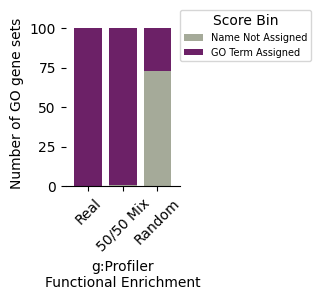

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the custom order for Score Types and Models
score_type_order = ['Real', 'Contaminated', 'Random']

color_palette = ['#A5AA99','#e39cc5','#af549e', '#6c2167']

fig, ax = plt.subplots(figsize=(2,3))

plt.rcParams['svg.fonttype'] = 'none'
# Plotting the new stacked bar plot
count_table.plot(kind='bar', stacked=True, ax=ax,  x='Gene set type',y=['Unassigned GO terms', 'Assigned GO terms'], color=['#A5AA99','#6c2167'], width=0.8, legend=False)
ax.set_xticklabels(['Real', '50/50 Mix', 'Random'], rotation=45)
ax.set_xlabel('g:Profiler\nFunctional Enrichment')
ax.set_ylabel('Number of GO gene sets')
        
plt.tight_layout()

# update labels 
handles, labels = ax.get_legend_handles_labels()
labels = ['Name Not Assigned', 'GO Term Assigned']

fig.legend(handles, labels, title='Score Bin', loc='upper left', bbox_to_anchor=(0.9,1), fontsize=7)

sns.despine(left=True)
# Saving the figure
# plt.savefig('figures/model_compare/functional_enrichment_gProfiler.svg', dpi=300, bbox_inches='tight')
plt.show()


## ALTERNATIVE

functional enrichment using Enrichr

In [ ]:
go_file = pd.read_csv('data/go_terms.csv', index_col=0)
go_file.head()

In [25]:
# create my own GO library from the 11.15.2023 version of the GO database
go_file = pd.read_csv('data/go_terms.csv', index_col=0)
# go_file.head()
# Transform the data to GMT format
gmt_data = go_file.apply(lambda x: f"{x['Term_Description']}({x['GO']})\t\t" + "\t".join(x['Genes'].split()), axis=1)

# Create a string from the transformed data
gmt_content = "\t\n".join(gmt_data)
# Specify the path for the new GMT file
gmt_file_path = 'data/GO_BP_20231115.gmt'

# Write the data to a GMT file
with open(gmt_file_path, 'w') as file:
    file.write(gmt_content)




In [ ]:
gmt_file_path = 'data/GO_BP_20231115.gmt'
gmt_go = gp.read_gmt(gmt_file_path)
gmt_go


In [107]:
df = pd.read_csv('data/GO_term_analysis/100_selected_go_contaminated.csv', index_col=0)

gene_cols = [col for col in df.columns if col.endswith('Genes')]
print(gene_cols)

# print(df.shape)
geneSeparator = ' '

['Genes', '50perc_contaminated_Genes', '100perc_contaminated_Genes']


In [108]:
import gseapy as gp
enrich_res_df = df.copy()
for col in gene_cols:
    df[f'{col} enriched term id'] = None
    df[f'{col} enriched term description'] = None
    df[f'{col} adj p-value'] = 1
    df[f'{col} overlap over enriched'] = 0
    df[f'{col} overlaping genes'] = None
    print(col)
    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        # print(i)
        genes = row[col].split(geneSeparator)
        # print(genes)
        enr = gp.enrich(gene_list=genes,
                        gene_sets='./data/GO_BP_20231115.gmt',
                        outdir=None,
                        verbose=False)
        enr_res = enr.results
        # print(enr_res)
        enr_res = enr_res.sort_values(by='Adjusted P-value', ascending=True, ignore_index=True)
        # print(enr_res)  
        top_term = enr_res['Term'][0]
        
        term_description = top_term.split('(')[0]
        term_id = top_term.split('(')[1].replace(')', '')
        adj_pval = enr_res['Adjusted P-value'][0]
        overlap = enr_res['Overlap'][0]
        overlap_genes = ','.join(enr_res['Genes'][0].split(';'))
            # print(term_description,term_id, adj_pval, overlap, overlap_genes)
        enrich_res_df.loc[i, f'{col} enriched term id'] = term_id
        enrich_res_df.loc[i, f'{col} enriched term description'] = term_description
        enrich_res_df.loc[i, f'{col} adj p-value'] = adj_pval
        enrich_res_df.loc[i, f'{col} overlap over enriched'] = overlap
        enrich_res_df.loc[i, f'{col} overlaping genes'] = overlap_genes

    enrich_res_df.to_csv(f'data/GO_term_analysis/100_GO_terms_enricher_res.tsv', sep='\t', index=True)
            

Genes


100%|██████████| 100/100 [10:41<00:00,  6.41s/it]


50perc_contaminated_Genes


100%|██████████| 100/100 [10:20<00:00,  6.20s/it]


100perc_contaminated_Genes


100%|██████████| 100/100 [09:31<00:00,  5.72s/it]


In [4]:
cutoff = 0.05
# check if the enriched term id equals to the index 
print(sum(enrich_res_df['Genes enriched term id'] == enrich_res_df.index), 'of the enriched term ids are equal to the queried GO id')
# check number of Nones in the enriched term id column
print(sum(enrich_res_df['Genes adj p-value']>cutoff), 'of the real GO term failed to return enriched term')
print(sum(enrich_res_df['50perc_contaminated_Genes adj p-value']>cutoff), 'of the contaminated GO term failed to return enriched term')
print(sum(enrich_res_df['100perc_contaminated_Genes adj p-value']>cutoff), 'of the random GO term failed to return enriched term')

92 of the enriched term ids are equal to the queried GO id
0 of the real GO term failed to return enriched term
3 of the contaminated GO term failed to return enriched term
85 of the random GO term failed to return enriched term


In [20]:
# check for the 9 umatched GO terms, are htey the go terms with the same set of genes but different names
def fill_duplicate_enrich(res_df, go_table_path = 'data/go_terms.csv'):
    go_table = pd.read_csv(go_table_path, index_col=0)
    go_table.set_index('GO', inplace=True)
    
    unmatched = res_df.loc[res_df['Genes enriched term id'] != res_df.index, :]
    for i, row in unmatched.iterrows():
        enriched_GO_id = row['Genes enriched term id']
        query_genes = row['Genes'].split(' ')
        if enriched_GO_id not in go_table.index.values:
            print(f'enriched term {enriched_GO_id} not in the go table!')
        
        else:
            enriched_genes = go_table.loc[enriched_GO_id, ['Genes']].values[0].split(' ')
        if set(query_genes) == set(enriched_genes):
            print('same set of genes')
            res_df.loc[i, 'Genes enriched term id'] = i
            res_df.loc[i, 'Genes enriched term description'] = go_table.loc[enriched_GO_id, 'Term_Description']
            continue
        else:
            print('different set of genes')
            print('queried term', i, ' ', row['Term_Description'])
            print('enriched term', row['Genes enriched term id'], ' ', row['Genes enriched term description'])
            print('queried genes', row['Genes'])
            print('enriched genes', go_table.loc[enriched_GO_id, 'Genes'])
            print('-------------------')
            
    return res_df

enrich_res_df = pd.read_csv('data/GO_term_analysis/100_GO_terms_enricher_res.tsv', sep='\t', index_col=0)
enrich_res_df = fill_duplicate_enrich(enrich_res_df)

same set of genes
same set of genes
same set of genes
same set of genes
same set of genes
same set of genes
same set of genes
same set of genes


In [22]:
cutoff = 0.05
# check if the enriched term id equals to the index 
print(sum(enrich_res_df['Genes enriched term id'] == enrich_res_df.index), 'of the enriched term ids are equal to the queried GO id')
# check number of Nones in the enriched term id column
print(sum(enrich_res_df['Genes adj p-value']>cutoff), 'of the real GO term failed to return enriched term')
print(sum(enrich_res_df['50perc_contaminated_Genes adj p-value']>cutoff), 'of the contaminated GO term failed to return enriched term')
print(sum(enrich_res_df['100perc_contaminated_Genes adj p-value']>cutoff), 'of the random GO term failed to return enriched term')

enrich_res_df.to_csv(f'data/GO_term_analysis/100_GO_terms_enricher_res.tsv', sep='\t', index=True)

100 of the enriched term ids are equal to the queried GO id
0 of the real GO term failed to return enriched term
3 of the contaminated GO term failed to return enriched term
85 of the random GO term failed to return enriched term


In [36]:
cutoff = 0.05
col_keep = [col for col in enrich_res_df.columns if '100perc_contaminated' in col]
false_pos_enrichr = enrich_res_df.loc[enrich_res_df['100perc_contaminated_Genes adj p-value']<cutoff, col_keep ]
false_pos_idx = false_pos_enrichr.index.values
false_pos_enrichr

,100perc_contaminated_Genes,100perc_contaminated_Genes enriched term id,100perc_contaminated_Genes enriched term description,100perc_contaminated_Genes adj p-value,100perc_contaminated_Genes overlap over enriched,100perc_contaminated_Genes overlaping genes
GO,,,,,,
GO:0061740,VEZT TERF1 TTC3,GO:0032214,negative regulation of telomere maintenance vi...,0.013348,1/2,TERF1
GO:0141085,TBC1D24 NIPSNAP2 IL1RL2 EGF PSMG2 GCSAML LIN7A...,GO:0045199,maintenance of epithelial cell apical/basal po...,0.002576,3/11,"LHX2,WDR1,LIN7A"
GO:0008292,CDH11 SLC22A8 RHOBTB2,GO:0003189,aortic valve formation,0.046875,1/2,CDH11
GO:0048840,TSTD1 SCGN BORA MARVELD3 ERO1A STX5 TSPAN4 EDE...,GO:0035966,response to topologically incorrect protein,0.019772,3/157,"ERO1A,EDEM1,DNAJB5"
GO:0006105,AKAP12 LBR PPP3CB CHRNA10 SNAP23 ATP6V0D2 PCGF1,GO:0007268,chemical synaptic transmission,0.025191,4/739,"PPP3CB,SNAP23,AKAP12,CHRNA10"
GO:0000296,SPACA5 CAMSAP3 KNL1,GO:0010256,endomembrane system organization,0.012853,3/594,"CAMSAP3,KNL1,SPACA5"
GO:2000347,ATP6V1G1 ZNF821 OR8J3 COX16 NCF4 ATP6V0A2 H1-4...,GO:0036295,cellular response to increased oxygen levels,0.007050,2/12,"ATP6V1G1,ATP6V0A2"
GO:1903651,MRPS16 NDUFAF6 KARS1 CD300C SLC35F4,GO:0045575,basophil activation,0.046691,1/3,KARS1
GO:1902966,PLXNA3 PTH2R OR2S2 TRIM17 MTHFR RFTN2 BHMT2 CA...,GO:0006555,methionine metabolic process,0.002844,2/16,"BHMT2,MTHFR"
